In [1]:
import cv2
import numpy as np

import os
from os import listdir
from os.path import isfile, join
import shutil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

In [2]:
path_temp_folder_images = "data/resumes/temp/"

In [3]:
path_directories = [x[0]  for x in os.walk(path_temp_folder_images)]

#random.shuffle(path_directories)

folder_rectagles = list(filter(lambda x: '_rectangles' in x, path_directories))

print(folder_rectagles)

['data/resumes/temp/images_resumes_105.pdf_rectangles', 'data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_1_105', 'data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_2_105', 'data/resumes/temp/images_resumes_102.pdf_rectangles', 'data/resumes/temp/images_resumes_106.pdf_rectangles', 'data/resumes/temp/images_resumes_107.pdf_rectangles', 'data/resumes/temp/images_resumes_10.pdf_rectangles', 'data/resumes/temp/images_resumes_100.pdf_rectangles', 'data/resumes/temp/images_resumes_104.pdf_rectangles', 'data/resumes/temp/images_resumes_103.pdf_rectangles', 'data/resumes/temp/images_resumes_1.pdf_rectangles', 'data/resumes/temp/images_resumes_101.pdf_rectangles']


In [4]:
def get_files_in_directory(path_directory, extension):

    onlyfiles = [f for f in listdir(path_directory) if isfile(join(path_directory, f))]

    files_names = list(filter(lambda x: '.'+extension in x, onlyfiles))
    
    files_names.sort()
    
    return files_names

In [5]:
def cut_image(path_file_image, path_output_images_folder):
    img = cv2.imread(path_file_image)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)

    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(gray,kernel,iterations = 1)

    fig = plt.figure()
    fig.set_size_inches(10,23)
    plt.title('erosion')
    plt.imshow(erosion, cmap='gray', aspect='auto') 
    plt.show()
    
    kernel = np.ones((4,4),np.uint8)
    dilation = cv2.dilate(erosion,kernel, iterations = 2)

    fig = plt.figure()
    fig.set_size_inches(10,23)
    plt.title('dilation')
    plt.imshow(dilation, cmap='gray', aspect='auto') 
    plt.show()

    blurred = cv2.GaussianBlur(gray, (7,7), 3)

    fig = plt.figure()
    fig.set_size_inches(10,23)
    plt.title('blurred')
    plt.imshow(blurred, cmap='gray', aspect='auto') 
    plt.show()

    img_thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]
    
    edged = cv2.Canny(img_thresh, 120, 255, 2)

    fig = plt.figure()
    fig.set_size_inches(10,23)
    plt.title('edged')
    plt.imshow(edged, cmap='gray', aspect='auto') 
    plt.show()

    # _, contours = cv2.findContours(gray, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)

    #rects = [cv2.boundingRect(cnt) for cnt in _]
    #rects = sorted(rects,key=lambda  x:x[1],reverse=False)

    """ Existe el problema que en los rectangulos toma el borde externo y el interno, con esto solo toma el externo"""
    rects , hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #rects = rects[0] if len(rects) == 2 else rects[1]

    i = -1
    j = 1
    y_old = 8000
    x_old = 8000
    for rect in rects:
        x, y, w, h = cv2.boundingRect(rect)
        # x, y, w, h = rect
        area = w * h
        print(area)
        
        if 50000 < area < 2535170:

            if (y_old - y) > 200:
                i += 1
                y_old = y
                print(area)

            if abs(x_old - x) > 0:
                x_old = x
                x, y, w, h = cv2.boundingRect(rect)
                # x,y,w,h = rect

                out = img[y+10:y+h-10, x+10:x+w-10]

                #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)

                #cv2.imshow('out', out)
                #cv2.waitKey(0)

                #cv2.destroyAllWindows()
                
                if out.any():
                    cv2.imwrite(join(path_output_images_folder,'crop_' + str(j) + '.jpeg'), out)

                j+=1

In [6]:
for directory in folder_rectagles:
    print("#########DELETE FOLDER###########")
    print(directory)
    path_directories = [x[0]  for x in os.walk(directory)]

    
    folder_cuts = list(filter(lambda x: 'cuts' in x, path_directories))

    print(folder_cuts)

    #Eliminar carpetas temporales "cuts"

    for dir in folder_cuts:

        if os.path.exists(dir):

            shutil.rmtree(dir)

        else:
            # file not found message
            print("File not found in the directory")

#########DELETE FOLDER###########
data/resumes/temp/images_resumes_105.pdf_rectangles
['data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_1_105', 'data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_2_105']
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_1_105
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_2_105
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_102.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_106.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_107.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_10.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_100.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_104.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/t

####################
data/resumes/temp/images_resumes_105.pdf_rectangles
1_105_rectangles.jpeg
data/resumes/temp/images_resumes_105.pdf_rectangles/1_105_rectangles.jpeg
data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_1_105


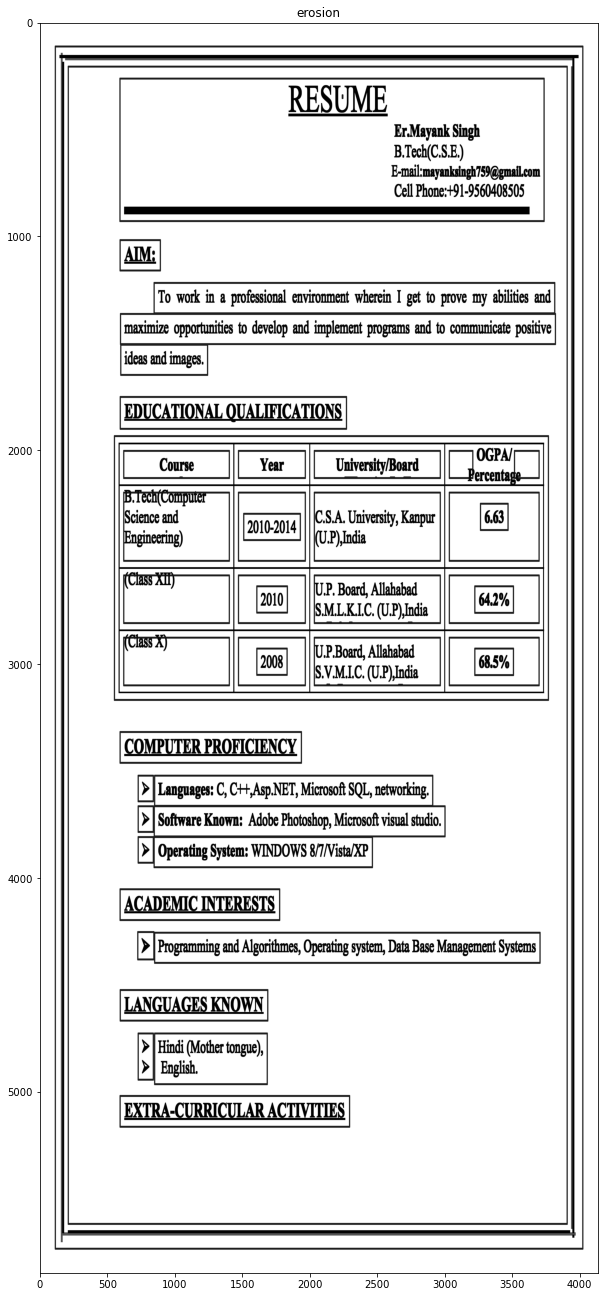

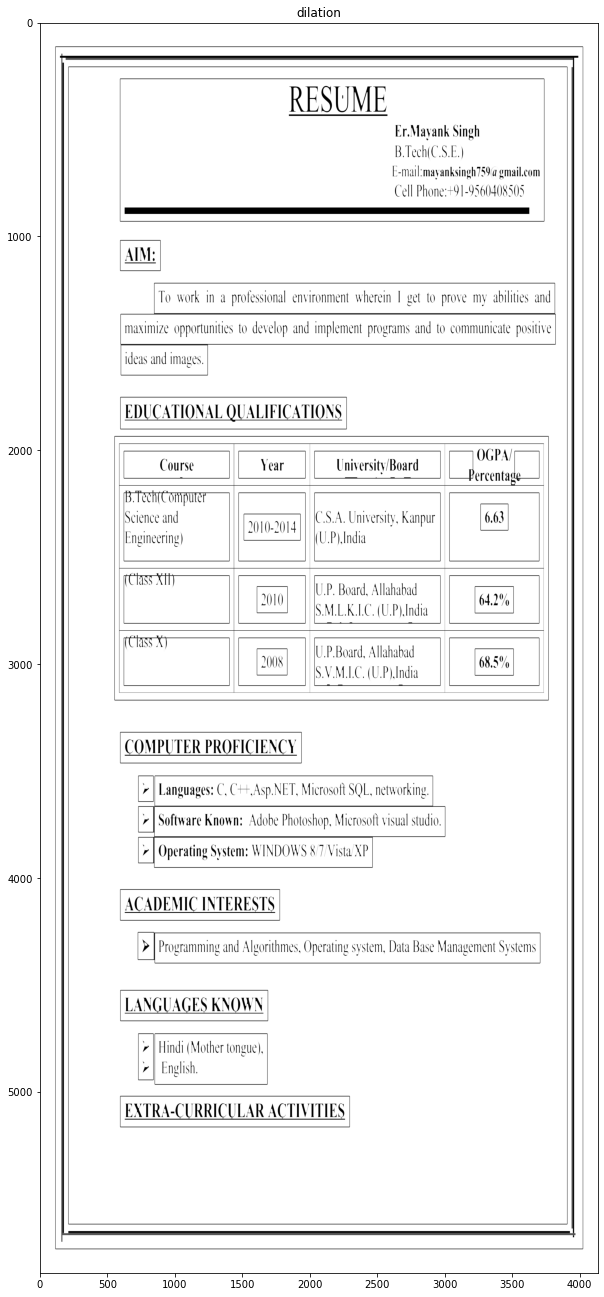

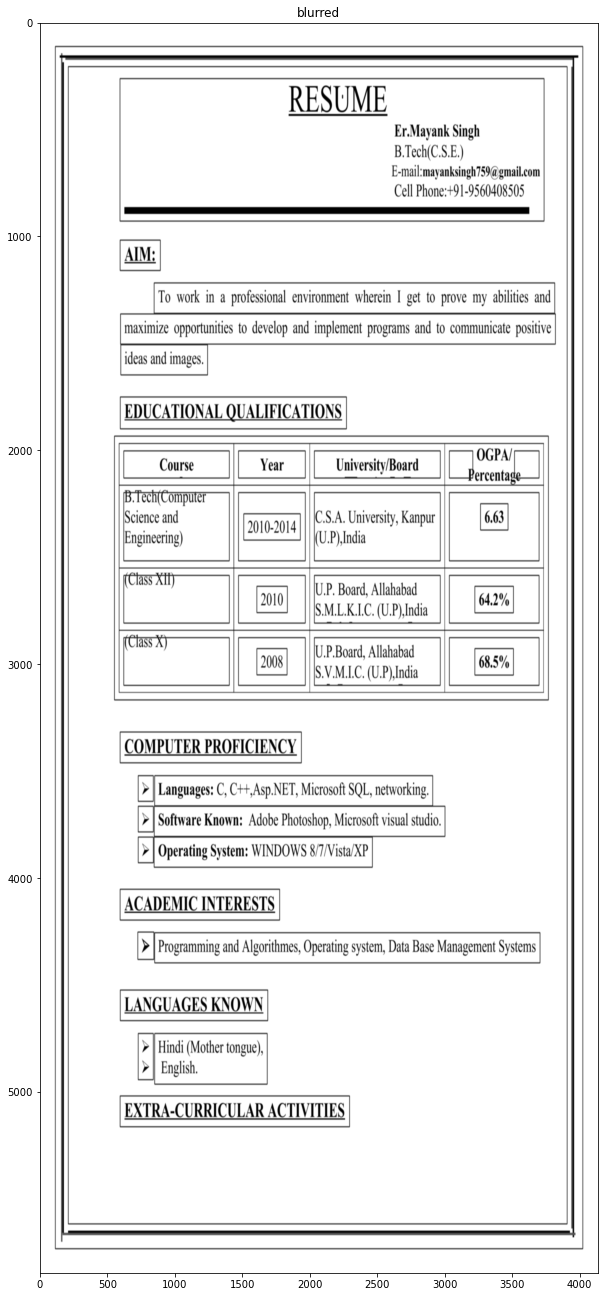

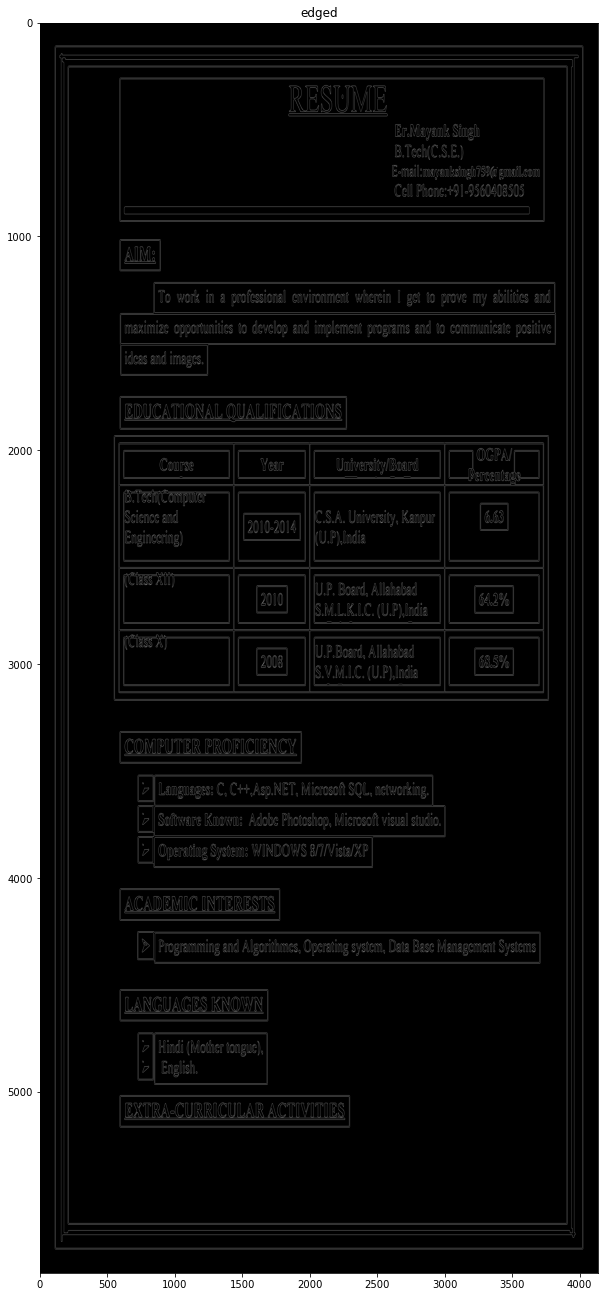

22016250
22016250
21920960
21920960
21355130
21355130
20769033
20769033
20046330
20046330
19955260
19955260
255900
255900
255900
237440
237440
14715
14715
360
360
4158
4158
288
288
4224
4224
288
288
4224
4224
288
288
3618
3618
1608
1608
4020
4020
1608
1608
4224
4224
1608
1608
4020
4020
4154
4154
560
560
3685
3685
3944
3944
1541
1541
4154
4154
560
560
4154
4154
560
560
3944
3944
4221
4221
560
560
4020
4020
4288
4288
3551
3551
3243
3243
4347
4347
4347
4347
4347
4347
204120
204120
204120
193390
193390
100
100
1053
176
1053
2128
2128
336
336
100
100
520
520
468
468
1435
1435
2378
2378
2065
2065
767
767
81
81
1
234
2128
2128
336
336
1400
1400
468
468
1000
1000
520
520
520
520
1386
1386
1435
1435
1558
1558
714
714
1386
1386
1558
1558
714
714
1435
1435
864
864
864
864
630
1
1122
1292
3596
3596
2784
2784
2065
2065
2280
2280
576
576
81
81
81
81
26196
26196
22896
22896
1488
1488
64
64
1488
1488
64
64
163751
163751
163751
151371
151371
8240
8240
4224
4224
288
288
4224
4224
288
288
4087
4087
6072


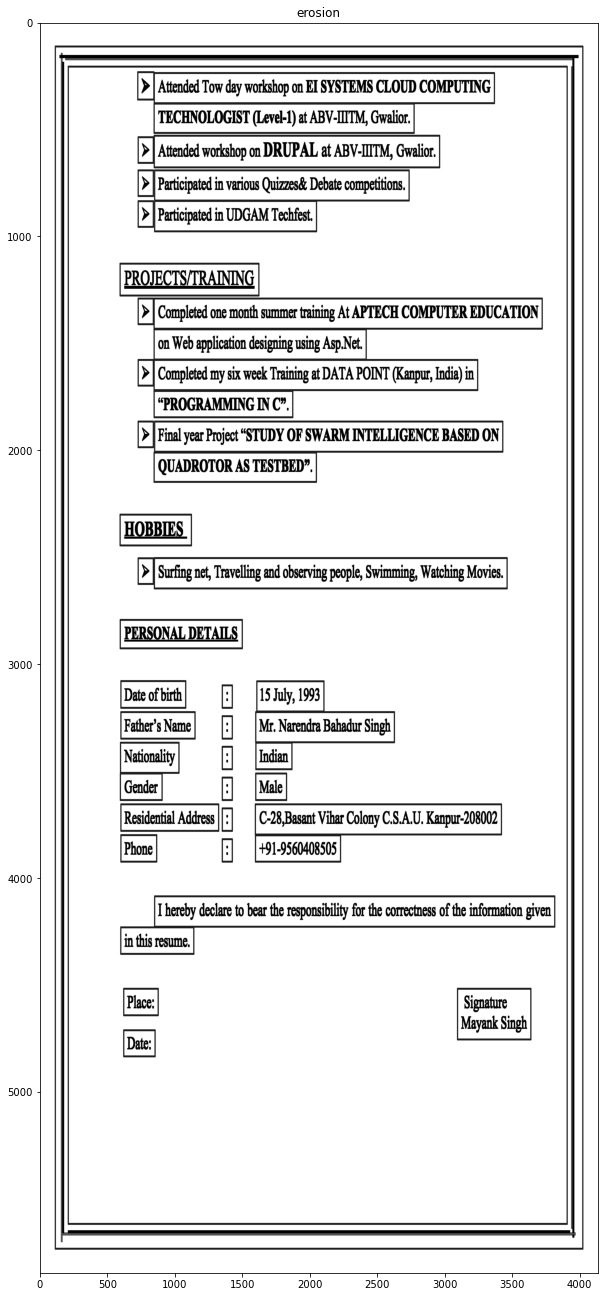

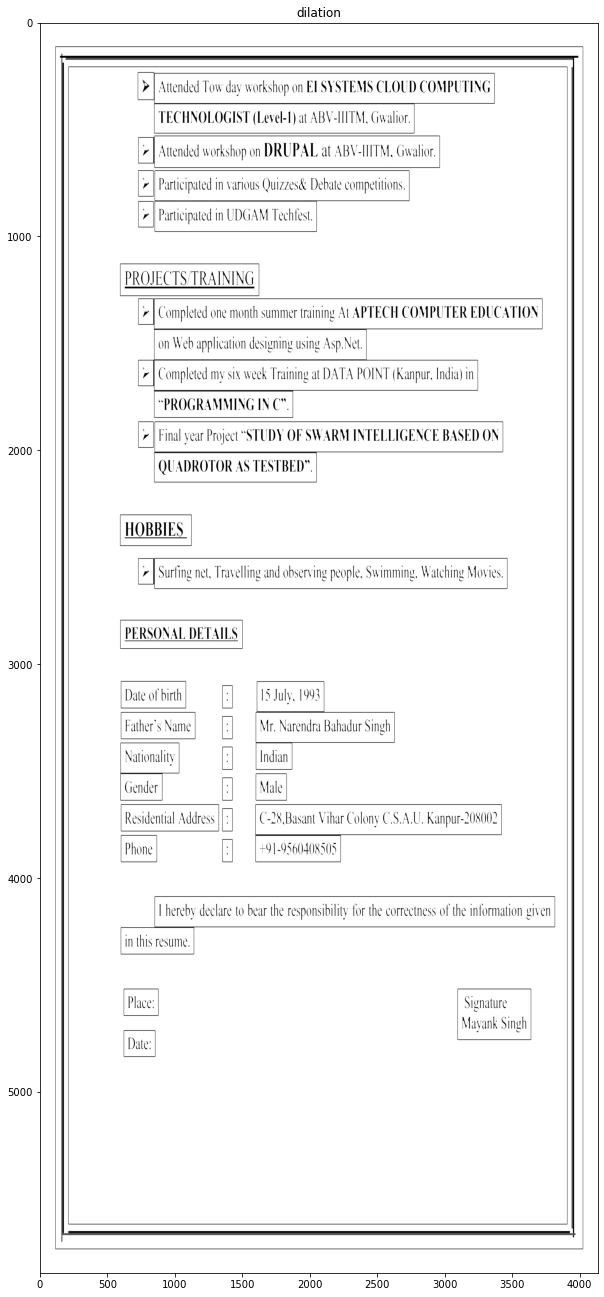

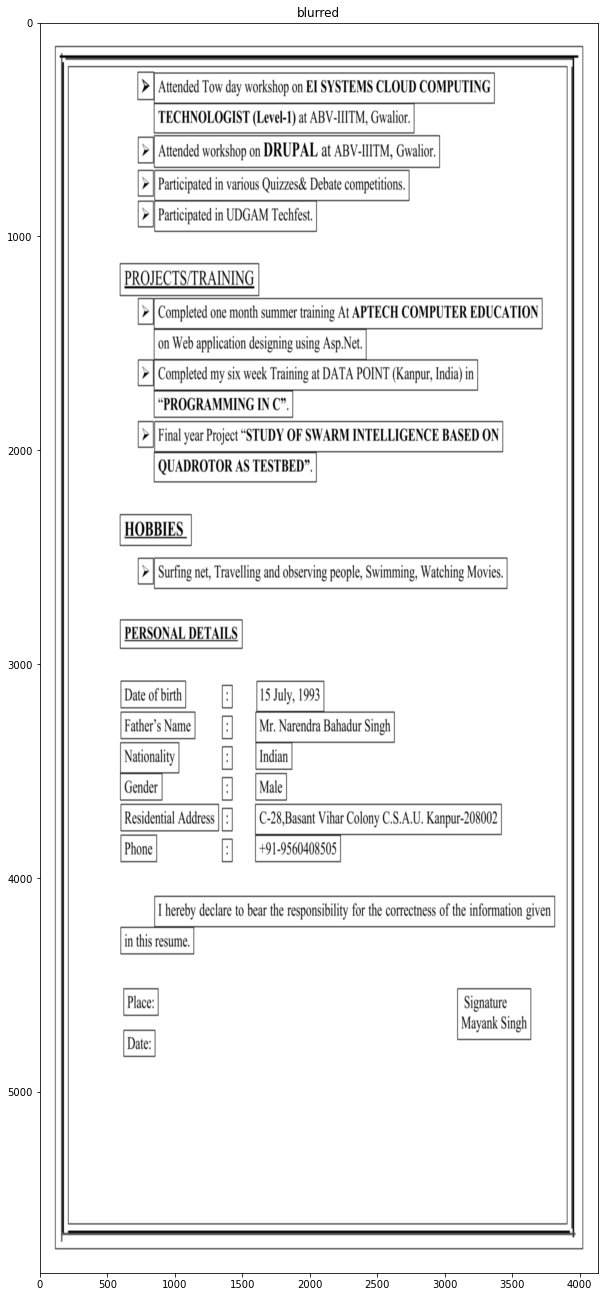

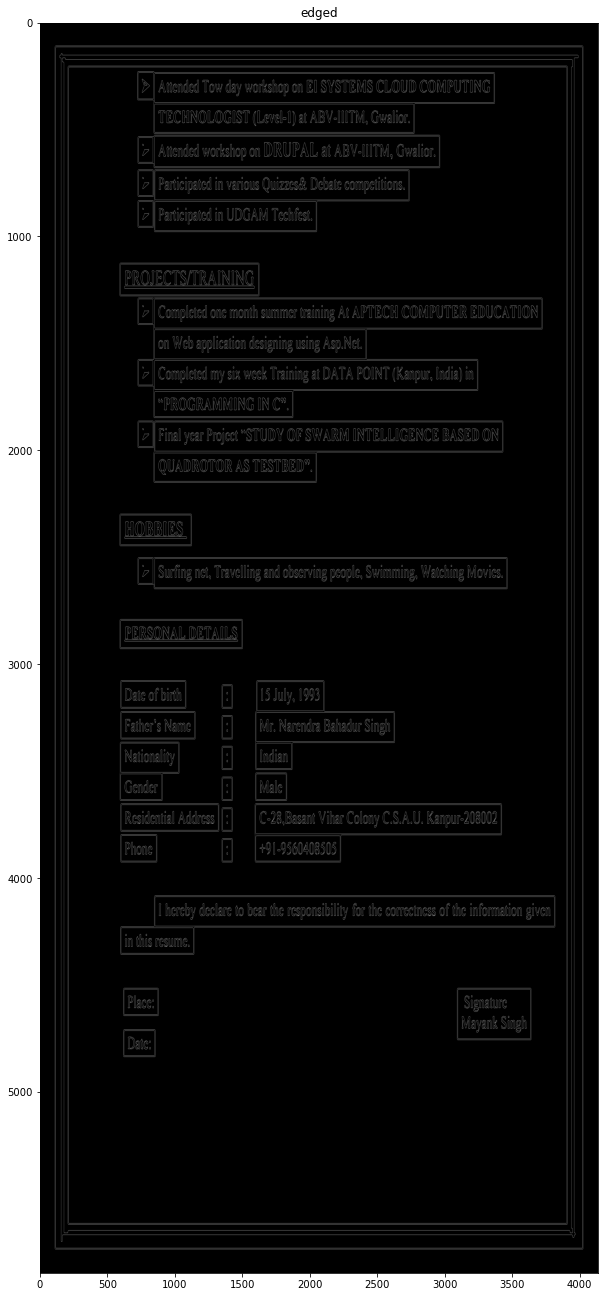

22016250
22016250
21920960
21920960
21355130
21355130
20769033
20769033
20046330
20046330
19955260
19955260
30464
30464
26904
26904
100
100
208
208
100
100
1280
1386
1386
864
864
2964
2964
1470
1470
133407
133407
133407
125587
125587
208
208
208
208
2128
2128
336
336
468
468
507
507
1320
2109
2109
1280
1435
1435
1400
1400
3596
3596
2030
2030
2280
2280
2030
2030
81
81
208
208
2128
2128
336
336
975
975
1400
1400
1280
468
468
507
507
1386
1386
1435
1435
912
912
2280
2280
81
81
33930
33930
30120
30120
100
100
208
208
100
100
1312
1312
1320
1386
1386
2204
400
2204
754
754
885775
885775
885775
64440
64440
100
100
1
1053
176
1053
176
1053
560
560
1400
1400
100
100
1000
1000
100
100
520
520
520
520
1386
1386
1763
1763
1386
1386
1435
1435
912
912
2065
2065
81
81
81
81
408480
408480
208
208
208
208
608
608
2128
2128
336
336
1
1053
176
1
1053
176
1
1053
176
1053
176
1053
1365
1365
520
520
468
468
1558
1558
714
714
520
520
1280
1280
208
208
560
560
1040
1040
1558
1558
714
714
520
520
1520
1520
714

3596
3596
2726
2726
870
870
870
870
870
870
2964
2964
2610
2610
576
576
506
506
767
767
3186
3186
2065
2065
2065
2065
2242
2242
576
576
2242
2242
576
576
81
81
4158
4158
288
288
3685
3685
3350
3350
378
378
3944
3944
4154
4154
560
560
4087
4087
1311
1311
767920
767920
767920
255626
255626
100
100
234
208
208
208
208
184
184
275
275
975
975
1520
1520
714
714
520
520
1320
2145
2145
1320
1386
1386
130
130
1480
1480
1386
1386
130
130
864
864
1540
1540
1540
1540
2968
2968
288
288
3596
3596
2679
2679
855
855
870
870
855
855
2964
2964
2565
2565
600
600
506
506
1160
1160
986
986
2668
2668
3016
3016
1160
1160
3540
3540
1508
1508
2668
2668
3540
3540
1508
1508
2907
2907
3016
3016
2610
2610
2958
2958
767
767
3245
3245
2400
2400
3480
3480
3240
3240
81
81
344692
344692
208
208
608
608
1053
176
1053
100
100
975
975
1520
1520
714
714
2145
2145
2109
2109
1280
2145
2145
1520
1520
714
714
1435
1435
1558
1558
714
714
2146
1558
1558
714
714
1386
1386
1400
1400
1386
1386
864
864
864
864
2968
2968
288
288
290

In [7]:
for directory in folder_rectagles:
    print("####################")
    print(directory)
    
    
    pages_images = files_names = get_files_in_directory(directory, "jpeg")
    for page_image in pages_images:
        print(page_image)
        part_name_file = page_image.split(".")
        
        pat_original_image = join(directory,page_image);
        print(pat_original_image)
        
        result_image_restangle_folder = directory + "/cuts_" + part_name_file[0].replace("_rectangles","")
        
        isExistFolder = os.path.exists(result_image_restangle_folder)

        if not isExistFolder:
            print(result_image_restangle_folder)
            os.makedirs(result_image_restangle_folder)
        
        #result_path_image = join(result_image_restangle_folder,part_name_file[0] + "_rectangles.jpeg")
        #print(result_path_image)
        #Process_Image(join(directory,page_image),result_path_image)
        
        cut_image(pat_original_image, result_image_restangle_folder)
        
    break
    